<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [294]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

In [295]:
# Cargar datos
path = "C:/Users/CHOMELY/Documents/1. Especialización Konrad Lorenz/1. Procesamiento de Lenguaje Natural (NLP)/Procesamiento-de-Lenguaje-Natural-NLP-/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [296]:
print(f"Tenemos: {data.shape[0]} Registros.")

data.sample(5) #Salen aleatorios los datos 1000 documentos

Tenemos: 1000 Registros.


,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
931,es_0632834,product_es_0329484,reviewer_es_0654494,3,"Me encanta el diseño. Pero son muy frágiles, s...",Su diseño.,es,jewelry
415,es_0859909,product_es_0452346,reviewer_es_0903765,1,"Engaño ,me han eviado una versión que no es uk...","Engaño,no viene castellano",es,video_games
349,es_0791173,product_es_0134632,reviewer_es_0004285,1,Todavía no ha llegado,Tarde,es,video_games
257,es_0355353,product_es_0814593,reviewer_es_0228747,4,Miy buen producto. Buenos materiales. Tras cas...,Muy buen producto,es,video_games
974,es_0044619,product_es_0199372,reviewer_es_0231969,2,No esta mal pero me esperaba que fuera mas gru...,Decepción,es,jewelry


In [297]:
data['language'].unique()

array(['es'], dtype=object)

In [298]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp] 
    texto = " ".join(texto)
    return texto


tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values) #fit_transform como no tenemos etiquetas no tenemos metricas de evalucacion, para los 
# modelo de agrupacion no se divide entre prueba  y entrenamiento (no es necesario)

tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())

print(f"Tenemos: {tfidf_matrix.shape[0]} Filas.")
print(f"Tenemos: {tfidf_matrix.shape[1]} Columnas.")
tfidf_matrix  #Es una matriz dispersa

Tenemos: 1000 Filas.
Tenemos: 3666 Columnas.


,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [299]:
ks = []
k_inertias = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)

In [300]:
ks

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [301]:
k_inertias

[987.4947060744681,
 980.3179291935368,
 974.8774716570279,
 970.8402762930517,
 964.8524274329526,
 962.3030726551202,
 958.546090503857,
 956.0585230249682,
 953.3064990518548,
 948.0896104619981,
 946.5622907735897,
 945.2159159141339,
 942.2434738981946,
 939.4293471093965,
 938.8162208329209,
 934.7851172735952,
 935.2769213186199,
 930.612197197533,
 928.2341781345555]

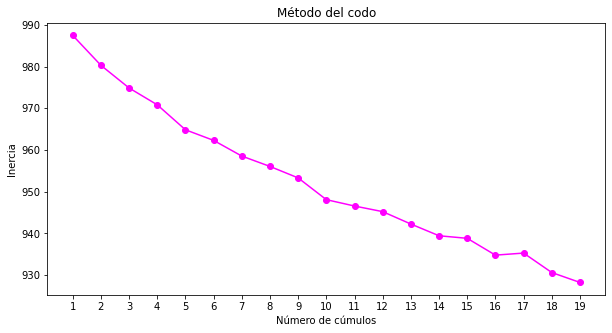

In [303]:
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.xticks(ks)
plt.plot(ks, k_inertias, 'bo-',color = 'magenta');

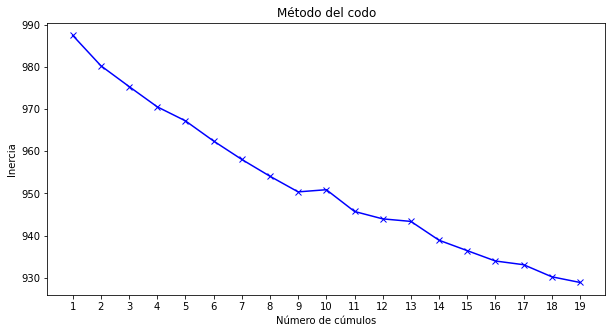

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [304]:
k = 10
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=10)

In [305]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,1
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,3
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,8
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,6
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,6
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,6
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,6
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,6
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,8


In [307]:
data[['review_body','cluster']]

,review_body,cluster
0,"Buen. Buena calidad, y buena presentación.",1
1,"Un producto a perfecto, para salir de casa con...",3
2,No funciona con Nintendo Switch. No hay forma ...,8
3,"Recomendado, los utilizo para pc y no me dan n...",6
4,El cable funciona bien podria ser un poco mas ...,6
...,...,...
995,En la foto parece que la cadena sea más gruesa...,6
996,"Bien por su precio, la cadena demasiado fina.",6
997,Muy bien!! Ahora tengo organizados los pendien...,6
998,"Las tapas para los joystics no están nada mal,...",8


In [308]:
print(f"Tenemos: {data[['review_body','cluster']].shape[0]} Filas.")
print(f"Tenemos: {data[['review_body','cluster']].shape[1]} Columnas.")

Tenemos: 1000 Filas.
Tenemos: 2 Columnas.


In [309]:
from termcolor import colored

###  `[15 pts]` Punto 4: Interpretación de los clusters

In [310]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(colored(f"Cluster No. {i}", 'blue', attrs=['bold','underline','reverse']))
    print(colored(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos", attrs=['bold']))
    print()
    
    print(colored("Términos más representativos", 'cyan', attrs=['bold']))
    for ind in order_centroids[i][:20]:
        print(colored(terms[ind], attrs=['bold']), end=" ")
    print()
    print()
    
    print(colored(f"Documentos más representativos", 'magenta', attrs=['bold']))
    for vecino in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("********************************************")
    print()

Cluster No. 0
Tiene 403 registros (40.30% de los datos

Términos más representativos
juego producto precio mas tiempo llego bonita solo pone buen hijo día queda español cumple artículo pedir esperaba fina entrega 

Documentos más representativos
 *** Un juego para mi hijo. No se ha pasado mucho tiempo jugando con él. No puedo opinar mucho más sobre este juego.

 *** Esperaba más del juego.

 *** No me ha gustado el juego.


********************************************

Cluster No. 1
Tiene 63 registros (6.30% de los datos

Términos más representativos
calidad buena precio mala relación buen bien demasiado compra pulsera baja regalo gustado presentación cumple gusto envio recomendable relacion muchísimo 

Documentos más representativos
 *** Calidad precio muy buena

 *** Calidad precio buena

 *** Calidad precio buena


********************************************

Cluster No. 2
Tiene 41 registros (4.10% de los datos

Términos más representativos
regalo grandes encantó hija compré día gu

CLUSTERS:

Cluster 0:
COUNT  52 comments (5.20% of the data)
TERMS  perfecto llegó tiempo gracias sido rápido justo juego tamaño producto recomendable rapido poner funciona igual funcionar buen mano castellano encanta 
REPRESENTATIVE COMMENTS
* Todo en perfecto estado
* Perfecto y en tiempo
* Llegó a tiempo y en perfecto estado


Cluster 1:
COUNT  211 comments (21.10% of the data)
TERMS  bien juego bastante aunque cadena funciona si viene español caja dos jugar solo producto mas regalo precio ps así imagen 
REPRESENTATIVE COMMENTS
* Está bien por su precio
* Por el precio que tiene está muy bien
* Esta bien,fue un regalo


Cluster 2:
COUNT  551 comments (55.10% of the data)
TERMS  producto llegado si buen regalo día mas bonitos foto mando bonita llego pulsera solo plata llegó pequeños tiempo mal amazon 
REPRESENTATIVE COMMENTS
* El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.
* No ha llegado el collar . La

In [311]:
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,1
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,3
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,8
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,6
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,6
...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,6
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,6
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,6
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,8


In [312]:
clusters = {0: 'opinión negativa videojuegos',
            1: "opinión positiva joyería",
            2: 'opinión positiva regalo',
            3: 'opinión positiva envío',
            4: 'opinión positiva joyería',
            5: 'opinión positiva joyería',
            6: 'opinión positiva producto',
            7: 'opinión negativa envío',
            8: 'opinión neutra videojuegos',
            9: 'opinión positiva producto'}

data['nombres_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(5)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,nombres_clusters
377,es_0608310,product_es_0239093,reviewer_es_0513549,3,Los botenes son muy sensibles y no detecta Bie...,Sin más,es,video_games,6,opinión positiva producto
819,es_0721752,product_es_0383933,reviewer_es_0431281,5,"Son muy bonitos, aunque pequeños en tamaño... ...",Muy bonitos y elegantes,es,jewelry,4,opinión positiva joyería
741,es_0813178,product_es_0375478,reviewer_es_0645098,5,buena calidad y rapido el envio,excelente vendedor,es,jewelry,1,opinión positiva joyería
132,es_0302856,product_es_0907235,reviewer_es_0714115,5,"Se lo regalamos a mi sobrina de 12 años, muy f...",Para un regalo,es,jewelry,0,opinión negativa videojuegos
226,es_0007527,product_es_0239150,reviewer_es_0752987,4,Es como espera bien de calidad aunque me queda...,Pulsera tibetana,es,jewelry,6,opinión positiva producto


In [313]:
df_centroids = pd.DataFrame(centroids)
df_centroids['cluster'] = clusters.values()
df_centroids

,0,1,2,3,4,5,6,7,8,9,...,3657,3658,3659,3660,3661,3662,3663,3664,3665,cluster
0,-7.589415e-19,-1.517883e-18,7.398500e-04,3.517316e-04,-1.029992e-18,-1.843144e-18,1.301844e-03,-8.131516e-20,8.586157e-04,-9.757820e-19,...,4.336809e-19,3.517316e-04,2.439455e-19,2.710505e-19,7.736644e-04,-1.517883e-18,2.168404e-19,2.632485e-03,2.720567e-03,opinión negativa videojuegos
1,-3.252607e-19,6.505213e-19,5.421011e-20,2.710505e-20,0.000000e+00,1.084202e-19,1.084202e-19,0.000000e+00,5.421011e-20,1.084202e-19,...,0.000000e+00,2.710505e-20,-2.710505e-20,-1.084202e-19,0.000000e+00,4.314571e-03,5.421011e-20,4.336809e-19,0.000000e+00,opinión positiva joyería
2,-2.168404e-19,9.510350e-03,0.000000e+00,-2.710505e-20,0.000000e+00,1.084202e-19,-1.084202e-19,2.710505e-20,5.421011e-20,6.387280e-03,...,0.000000e+00,-2.710505e-20,-2.710505e-20,0.000000e+00,-1.084202e-19,-2.168404e-19,5.421011e-20,4.336809e-19,-2.168404e-19,opinión positiva regalo
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.421011e-20,1.084202e-19,-1.084202e-19,5.421011e-20,5.421011e-20,1.084202e-19,...,1.714495e-02,0.000000e+00,-2.710505e-20,0.000000e+00,-5.421011e-20,6.981527e-03,5.421011e-20,4.336809e-19,0.000000e+00,opinión positiva envío
4,-1.084202e-19,0.000000e+00,5.421011e-20,-2.710505e-20,0.000000e+00,4.073708e-03,1.084202e-19,5.421011e-20,5.421011e-20,8.584722e-03,...,0.000000e+00,-2.710505e-20,-2.710505e-20,5.421011e-20,-5.421011e-20,0.000000e+00,1.084202e-19,1.009139e-02,-4.336809e-19,opinión positiva joyería
5,-3.252607e-19,1.774835e-02,5.421011e-20,5.421011e-20,0.000000e+00,1.084202e-19,0.000000e+00,0.000000e+00,5.421011e-20,1.084202e-19,...,0.000000e+00,5.421011e-20,-2.710505e-20,-1.084202e-19,0.000000e+00,0.000000e+00,5.421011e-20,2.903704e-03,0.000000e+00,opinión positiva joyería
6,4.772922e-03,2.168404e-19,1.084202e-19,5.421011e-20,2.311735e-03,1.084202e-19,-1.084202e-19,-2.710505e-20,5.421011e-20,3.252607e-19,...,1.084202e-19,5.421011e-20,0.000000e+00,3.449855e-03,1.084202e-19,2.076443e-03,5.421011e-20,1.078698e-03,0.000000e+00,opinión positiva producto
7,0.000000e+00,2.168404e-19,0.000000e+00,0.000000e+00,0.000000e+00,7.961754e-03,-1.084202e-19,2.710505e-20,5.421011e-20,0.000000e+00,...,0.000000e+00,0.000000e+00,-2.710505e-20,0.000000e+00,-1.084202e-19,0.000000e+00,0.000000e+00,4.336809e-19,-2.168404e-19,opinión negativa envío
8,2.960633e-03,0.000000e+00,1.084202e-19,8.131516e-20,-5.421011e-20,0.000000e+00,-3.252607e-19,-2.710505e-20,5.421011e-20,4.336809e-19,...,4.336809e-19,8.131516e-20,1.383798e-03,-1.626303e-19,2.168404e-19,2.623246e-03,0.000000e+00,4.055916e-03,2.510159e-03,opinión neutra videojuegos
9,1.013978e-03,2.168404e-19,5.421011e-20,8.131516e-20,2.076495e-03,3.970310e-03,1.491068e-03,1.760267e-03,0.000000e+00,2.168404e-19,...,2.168404e-19,8.131516e-20,-2.710505e-20,-1.626303e-19,5.421011e-20,2.168404e-19,2.735520e-03,4.336809e-19,0.000000e+00,opinión positiva producto


###  `[BONUS: 3 pts]` Visualización usando PCA

In [315]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.nombres_clusters.values
result['texto'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'opinión negativa videojuegos': 'blue',
             'opinión positiva joyería': 'yellow',
             'opinión positiva regalo': 'green',
             'opinión positiva envío': 'red',
             'opinión positiva joyería': 'yellow',
             'opinión positiva joyería': 'yellow',
             'opinión positiva producto' : 'white',
             'opinión negativa envío': 'cyan',
             'opinión neutra videojuegos': 'magenta',
             'opinión positiva producto' : 'white'}

result['colores'] = result['cluster'].map(colorsIdx)


result.head()

,X,Y,cluster,texto,colores
0,0.486453,-0.324205,opinión positiva joyería,"Buen. Buena calidad, y buena presentación.",yellow
1,-0.106968,-0.147067,opinión positiva envío,"Un producto a perfecto, para salir de casa con...",red
2,-0.071090,-0.030766,opinión neutra videojuegos,No funciona con Nintendo Switch. No hay forma ...,magenta
3,0.031569,0.235447,opinión positiva producto,"Recomendado, los utilizo para pc y no me dan n...",white
4,0.016537,0.095610,opinión positiva producto,El cable funciona bien podria ser un poco mas ...,white


In [316]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['texto'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

# Comparación

### `[BONUS 20 pts (validos para cualquier tarea)]` 
### Hacer predicción para estas dos frases de los dos modelos (clasificación y $k$-means)

In [389]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]

In [390]:
test_trans = tfidf_vect.transform(test)
[clusters[i] for i in model.predict(test_trans)]

['opinión negativa videojuegos', 'opinión positiva joyería']

clasificación

In [345]:
data.product_category.value_counts()

jewelry        502
video_games    498
Name: product_category, dtype: int64

In [367]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

In [347]:
train, test = train_test_split(data, test_size=0.2, random_state=42) #0.2 tamaño muestra random_state=42 -semilla
print(f"Tenemos {data.shape[0]} datos en total.")

Tenemos 1000 datos en total.


In [348]:
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.") #80%
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")# 20%

El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


In [349]:
tfidf_vect1 = TfidfVectorizer(preprocessor=pre_procesado) #para el preprocesador de texto y transformación numerica
#pasar del preprocesado a pasarlo a valores numericos
tfidf_vect1.fit(train.review_body.values); #enviar directamente a tfidf con el preprocessor sobr

In [356]:
X_train = tfidf_vect1.transform(train.review_body.values) #fit transform entrena los datos y despues se transforma, lee lo que esta en xtrain y hace la conversion de las palabras
y_train = train.product_category.values #transform todo tenga el mismo preprocesamiento tanto los datos de test y train

X_test = tfidf_vect1.transform(test.review_body.values) # sobre las palabras que el modelo conoce ya
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3221)
Tamaño de X_test (prueba): (200, 3221)
Tamaño de y_train 800 y tamaño de y_test 200


Naive-Bayes

In [357]:
from sklearn.naive_bayes import MultinomialNB 

In [358]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [359]:
nb = MultinomialNB()

In [360]:
nb.fit(X_train, y_train)

MultinomialNB()

In [361]:
X_test.shape

(200, 3221)

In [362]:
y_pred_nb = nb.predict(X_test) 

In [365]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200




Text(0.5, 1.0, 'Naive Bayes')

<Figure size 576x576 with 0 Axes>

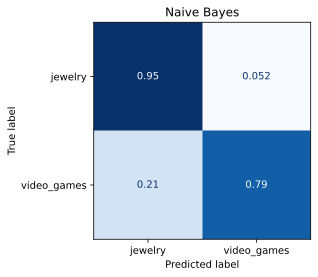

In [371]:
#visualizacion
%config InlineBackend.figure_format = 'svg' #otra funciones y no especificamente de python linea permite mejorar las imagenes para que se vean mejor

fig = plt.figure(figsize=(8,8)) #figura de 10 x 10 ax1, 

plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")


In [372]:
tfidf_vect1.vocabulary_.items()

dict_items([('mismísimo', 1897), ('juego', 1637), ('ordenador', 2077), ('creía', 685), ('mejorado', 1840), ('gráficos', 1424), ('bien', 294), ('queda', 2466), ('corto', 670), ('ahora', 103), ('primera', 2366), ('vez', 3144), ('compro', 583), ('amazon', 149), ('ultima', 3051), ('sido', 2777), ('perfecta', 2213), ('buenas', 334), ('compramos', 568), ('colgante', 517), ('forma', 1312), ('corazón', 652), ('salido', 2717), ('defectuoso', 773), ('creo', 683), ('plata', 2273), ('vino', 3160), ('caja', 373), ('rayado', 2527), ('ido', 1511), ('rayando', 2530), ('llevándolo', 1744), ('cuerpo', 705), ('caerse', 370), ('pasando', 2150), ('cuello', 701), ('durado', 990), ('bonito', 314), ('dos', 969), ('días', 1001), ('duda', 978), ('pagaría', 2108), ('casi', 439), ('mismo', 1895), ('vendedor', 3112), ('esperamos', 1169), ('respuesta', 2646), ('llegó', 1732), ('día', 1000), ('tocaba', 2979), ('pedí', 2164), ('agosto', 89), ('dijeron', 911), ('llegaría', 1728), ('lanzamiento', 1672), ('noviembre', 2

In [373]:
# Explicación 
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()} 
#Diccionario por comprensión para cada llave y valores las palabras
#para cada llave y valor en la lista de las tuplas del diccionario que regrese la llave y el valor, llaves son los indices
vocab

{396: 'buen',
 397: 'buena',
 446: 'calidad',
 2689: 'presentación',
 2722: 'producto',
 2535: 'perfecto',
 3108: 'salir',
 511: 'casa',
 2296: 'nintendo',
 3311: 'switch',
 1546: 'funciona',
 1518: 'forma',
 1200: 'emparejarlo',
 2616: 'poder',
 1894: 'jugar',
 2917: 'recomendado',
 3517: 'utilizo',
 2471: 'pc',
 853: 'dan',
 2295: 'ningún',
 2714: 'problema',
 2404: 'oye',
 350: 'bien',
 2405: 'oyen',
 424: 'cable',
 2618: 'podria',
 3154: 'ser',
 2094: 'mas',
 1927: 'largo',
 68: 'adapta',
 2533: 'perfectamente',
 965: 'descripcion',
 1292: 'envio',
 2858: 'rapido',
 3653: 'és',
 372: 'bonito',
 1206: 'empuñadura',
 1321: 'espada',
 3053: 'rompe',
 1570: 'fácilmente',
 686: 'compré',
 2956: 'regalar',
 2993: 'repetiré',
 659: 'compra',
 3137: 'seguro',
 2673: 'precio',
 1379: 'estupendas',
 1139: 'dudarlo',
 2916: 'recomendable',
 3169: 'señores',
 1125: 'dos',
 3541: 'veces',
 661: 'comprado',
 2542: 'perlas',
 430: 'cada',
 3558: 'venido',
 3066: 'rota',
 2518: 'perder',
 3378: 't

In [374]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))] [-10:]

C:\Users\CHOMELY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning:

Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).



[('bonitos', -6.52),
 ('gta', -6.51),
 ('puertos', -6.35),
 ('barita', -6.32),
 ('incrustado', -6.29),
 ('ocasiones', -6.23),
 ('orejitas', -6.1),
 ('montarlo', -6.01),
 ('autenticidad', -5.82),
 ('grosor', -5.55)]

In [393]:
# Resultados
nuevos = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevos_trans = tfidf_vect1.transform(nuevos)
nb.predict(nuevos_trans)
# nb.predict_proba(nuevos_trans)

array(['video_games', 'jewelry', 'jewelry'], dtype='<U11')

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

De acuerdo con el método del codo se realizó la selección de un K = 10 inicialmente se observa con la gráfica que los documentos están dispersos, adicional que los clusters no se diferencia adecuadamente. No obstante, se exploró el K=16 pero este genera más grupos, ya que separa no solo las categorías de videojuegos y joyería, sino que opiniones respecto a un servicio o producto,
y respecto a la joyería genera distintas clasificaciones, es decir un cluster para una opinión de joyería (Collares, Colgantes, Pulseras, etc), por tanto, dificulta la clasificación intuitiva de la clase de cada documento. 

Respecto a las diferencias, a pesar de que ambos modelos realizaron una clasificación acertada respecto al tipo si es joyería o videojuegos dado que tenían una palabra clave, sin embargo, con los 10 cluster el modelo se puede equivocar de categoría si esta no fue correctamente etiquetada, ya que una opinión respecto a joyería puede estar en 3 grupos diferentes.

Este fue el acercamiento con 16 clusters

opinión neutra servicio-producto
opinión negativa productos videojuego
opinión neutra joyería (Collar-Colgante)
opinión negativa productos videojuego
opinión positiva producto
opinión positiva joyería(Pulsera)
opinión neutra joyería
opinión positiva joyería 
opinión positiva productos videojuego
opinión negutra joyería (Cadena)
opinión positiva servicio-producto
opinión neutra productos videojuego
opinión positiva joyería(Anillo-Collar)
opinión negativa servicio-producto
opinión negativa joyería(Pendientes,Pulsera)
opinión positiva joyería(Pulsera)


Considero que los cluster en este caso aplicarían más al tipo de opinión sobre un producto o servicio, pero no sobre uno en especifico, dado que se crean muchas raices y al intentar clasificar intuitivamente con tantas clases tiende a ser una tarea dificil.


Julieth Andrea Murte Tavera 🤓